# Create Database from Heatpump Keymark
## 1) download from https://keymark.eu/en/products/heatpumps/certified-products
## 2) use dash-skript to convert pdf into txt
## 3) use this skript:




In [1]:
import os
import pandas as pd
import scipy
from scipy.optimize import curve_fit

In [2]:
Modul=[]
Manufacturer=[]
Date=[]
Refrigerant=[]
Mass=[]
Poff=[]
Psb=[]
Prated=[]
SPLindoor=[]
SPLoutdoor=[]
Type=[]
Climate=[]
Guideline=[]
T_in=[]
T_out=[]
P_th=[]
COP=[]
df=pd.DataFrame()
Scanordner=(os.path.abspath('')+r'\input\txt')
os.chdir(Scanordner)
Scan = os.scandir(os.getcwd())
with Scan as dir1:
    for file in dir1:
        with open (file, 'r',encoding='utf-8') as f:
            contents=f.readlines()
            date='NaN'
            modul='NaN'
            prated_low='NaN'
            prated_medium='NaN'
            heatpumpType='NaN'
            refrigerant='NaN'
            splindoor_low='NaN'
            splindoor_medium='NaN'
            sploutdoor_low='NaN'
            sploutdoor_medium='NaN'
            poff='NaN'
            climate='NaN'
            NumberOfTestsPerNorm=[]
            NumberOfTestsPerModule=[]
            i=1#indicator for the line wich is read
            d=0 #indicator if only medium Temperature is given
            p=0#-15° yes or no
            date=contents[1]
            date=date[61:]
            if(date=='17 Dec 2020\n'):
                date='17.12.2020\n'
            if(date=='18 Dec 2020\n'):
                date='18.12.2020\n'
            if(date.startswith('5 Mar 2021')):
                date='05.03.2021\n'
            if(date.startswith('15 Feb 2021')):
                date='15.02.2021\n'
            if(date.startswith('22 Feb 2021')):
                date='22.02.2021\n'
            for lines in contents:
                i=i+1
                if(lines.startswith('Name\n')==1):
                    manufacturer = (contents[i])
                    if (manufacturer.find('(')>0):
                        manufacturer=manufacturer.split('(', 1)[1].split('\n')[0]
                    if manufacturer.endswith('GmbH\n'):
                        manufacturer=manufacturer[:-5]
                    if manufacturer.endswith('S.p.A.\n'):
                        manufacturer=manufacturer[:-6]
                    if manufacturer.endswith('s.p.a.\n'):
                        manufacturer=manufacturer[:-6]
                    if manufacturer.endswith('S.p.A\n'):
                        manufacturer=manufacturer[:-5]
                    if manufacturer.endswith('S.L.U.\n'):
                        manufacturer=manufacturer[:-6]
                    if manufacturer.endswith('s.r.o.\n'):
                        manufacturer=manufacturer[:-6]
                    if manufacturer.endswith('S.A.\n'):
                        manufacturer=manufacturer[:-4]
                    if manufacturer.endswith('S.L.\n'):
                        manufacturer=manufacturer[:-4]
                    if manufacturer.endswith('B.V.\n'):
                        manufacturer=manufacturer[:-4]
                    if manufacturer.endswith('N.V.\n'):
                        manufacturer=manufacturer[:-4]
                    if manufacturer.endswith('GmbH & Co KG\n'):
                        manufacturer=manufacturer[:-12]
                    elif manufacturer.startswith('NIBE'):
                        manufacturer='Nibe\n'
                    elif manufacturer.startswith('Nibe'):
                        manufacturer='Nibe\n'
                    elif manufacturer.startswith('Mitsubishi'):
                        manufacturer='Mitsubishi\n'
                    elif manufacturer.startswith('Ochsner'):
                        manufacturer='Ochsner\n'
                    elif manufacturer.startswith('OCHSNER'):
                        manufacturer='Ochsner\n' 
                    elif manufacturer.startswith('Viessmann'):
                        manufacturer='Viessmann\n'
                       
                elif(lines.endswith('Date\n')==1):
                    date = (contents[i])
                    if (date=='basis\n'):
                        date = contents[i-3]
                        date = date[14:] 
                elif(lines.startswith('Model')==1):
                    modul = (contents[i-2])
                    splindoor_low='NaN'
                    splindoor_medium='NaN'
                    sploutdoor_low='NaN'
                    sploutdoor_medium='NaN'
                elif lines.endswith('Type\n'):
                    heatpumpType=contents[i][:-1]
                    if heatpumpType.startswith('A'):
                        heatpumpType= 'Outdoor Air/Water'
                    if heatpumpType.startswith('Eau glycol'):
                        heatpumpType= 'Brine/Water'
                elif(lines.startswith('Sound power level indoor')):

                    SPL=1
                    if(contents[i].startswith('Low')):
                        if contents[i+2].startswith('Medium'):
                            splindoor_low= contents[i+4][:-7]
                            splindoor_medium= contents[i+6][:-7]
                    if contents[i].startswith('Medium'):
                        splindoor_medium=contents[i+4][:-7]
                        splindoor_low= contents[i+6][:-7]
                    elif(contents[i].endswith('dB(A)\n')):
                        if(contents[i-3].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        if(contents[i-3].startswith('Medium')):
                            splindoor_medium=contents[i][:-7]
                        if(contents[i-6].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        
                        if(contents[i-6].startswith('Medium')):
                            splindoor_medium=contents[i+2][:-7]
                        if(contents[i-4].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        if(contents[i-4].startswith('Medium')):
                            splindoor_medium=contents[i+2][:-7]
                        else:
                            splindoor_low=contents[i][:-7]
                            splindoor_medium=contents[i][:-7]

                elif(lines.startswith('Sound power level outdoor')):
                    SPL=1
                    if(contents[i].startswith('Low')):
                        if contents[i+2].startswith('Medium'):
                            sploutdoor_low= contents[i+4][:-7]
                            sploutdoor_medium= contents[i+6][:-7]
                    if contents[i].startswith('Medium'):
                        sploutdoor_medium=contents[i+4][:-7]
                        sploutdoor_low= contents[i+6][:-7]
                    elif(contents[i].endswith('dB(A)\n')):
                        if(contents[i-3].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-3].startswith('Medium')):
                            sploutdoor_medium=contents[i][:-7]
                        if(contents[i-6].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-6].startswith('Medium')):
                            sploutdoor_medium=contents[i+2][:-7]
                        if(contents[i-4].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-4].startswith('Medium')):
                            sploutdoor_medium=contents[i+2][:-7]
                        else:
                            sploutdoor_low=contents[i][:-7]
                            sploutdoor_medium=contents[i][:-7]

                elif(lines.startswith('Puissance acoustique extérieure')):
                    b=1
                    if(contents[i].startswith('Low')):
                        if contents[i+2].startswith('Medium'):
                            sploutdoor_low= contents[i+4][:-7]
                            sploutdoor_medium= contents[i+6][:-7]
                    if contents[i].startswith('Medium'):
                        sploutdoor_medium=contents[i+4][:-7]
                        sploutdoor_low= contents[i+6][:-7]
                    elif(contents[i].endswith('dB(A)\n')):
                        if(contents[i-3].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-3].startswith('Medium')):
                            sploutdoor_medium=contents[i][:-7]
                        if(contents[i-6].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-6].startswith('Medium')):
                            sploutdoor_medium=contents[i+2][:-7]
                        if(contents[i-4].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-4].startswith('Medium')):
                            sploutdoor_medium=contents[i+2][:-7]
                        else:
                            sploutdoor_low=contents[i][:-7]
                            sploutdoor_medium=contents[i][:-7]
                elif(lines.startswith('Potencia sonora de la unidad interior')):
                    SPL=1
                    if(contents[i].startswith('Low')):
                        if contents[i+2].startswith('Medium'):
                            splindoor_low= contents[i+4][:-7]
                            splindoor_medium= contents[i+6][:-7]
                    if contents[i].startswith('Medium'):
                        splindoor_medium=contents[i+4][:-7]
                        splindoor_low= contents[i+6][:-7]
                    elif(contents[i].endswith('dB(A)\n')):
                        if(contents[i-3].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        if(contents[i-3].startswith('Medium')):
                            splindoor_medium=contents[i][:-7]
                        if(contents[i-6].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        if(contents[i-6].startswith('Medium')):
                            splindoor_medium=contents[i+2][:-7]
                        if(contents[i-4].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        if(contents[i-4].startswith('Medium')):
                            splindoor_medium=contents[i+2][:-7]
                        else:
                            splindoor_low=contents[i][:-7]
                            splindoor_medium=contents[i][:-7]
                elif(lines.startswith('Potencia sonora de la unidad exterior')):
                    SPL=1
                    if(contents[i].startswith('Low')):
                        if contents[i+2].startswith('Medium'):
                            sploutdoor_low= contents[i+4][:-7]
                            sploutdoor_medium= contents[i+6][:-7]
                    if contents[i].startswith('Medium'):
                        sploutdoor_medium=contents[i+4][:-7]
                        sploutdoor_low= contents[i+6][:-7]
                    elif(contents[i].endswith('dB(A)\n')):
                        if(contents[i-3].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-3].startswith('Medium')):
                            sploutdoor_medium=contents[i][:-7]
                        if(contents[i-6].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-6].startswith('Medium')):
                            sploutdoor_medium=contents[i+2][:-7]
                        if(contents[i-4].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-4].startswith('Medium')):
                            sploutdoor_medium=contents[i+2][:-7]
                        else:
                            sploutdoor_low=contents[i][:-7]
                            sploutdoor_medium=contents[i][:-7]
                elif(lines.startswith('Nivel de Potência sonora interior')):
                    SPL=1
                    if(contents[i].startswith('Low')):
                        if contents[i+2].startswith('Medium'):
                            splindoor_low= contents[i+4][:-7]
                            splindoor_medium= contents[i+6][:-7]
                    if contents[i].startswith('Medium'):
                        splindoor_medium=contents[i+4][:-7]
                        splindoor_low= contents[i+6][:-7]
                    elif(contents[i].endswith('dB(A)\n')):
                        if(contents[i-3].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        if(contents[i-3].startswith('Medium')):
                            splindoor_medium=contents[i][:-7]
                        if(contents[i-6].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        if(contents[i-6].startswith('Medium')):
                            splindoor_medium=contents[i+2][:-7]
                        if(contents[i-4].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        if(contents[i-4].startswith('Medium')):
                            splindoor_medium=contents[i+2][:-7]
                        else:
                            splindoor_low=contents[i][:-7]
                            splindoor_medium=contents[i][:-7]
                elif(lines.startswith('Nivel de Potência sonora exterior')):
                    SPL=1
                    if(contents[i].startswith('Low')):
                        if contents[i+2].startswith('Medium'):
                            sploutdoor_low= contents[i+4][:-7]
                            sploutdoor_medium= contents[i+6][:-7]
                    if contents[i].startswith('Medium'):
                        sploutdoor_medium=contents[i+4][:-7]
                        sploutdoor_low= contents[i+6][:-7]
                    elif(contents[i].endswith('dB(A)\n')):
                        if(contents[i-3].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-3].startswith('Medium')):
                            sploutdoor_medium=contents[i][:-7]
                        if(contents[i-6].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-6].startswith('Medium')):
                            sploutdoor_medium=contents[i+2][:-7]
                        if(contents[i-4].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-4].startswith('Medium')):
                            sploutdoor_medium=contents[i+2][:-7]
                        else:
                            sploutdoor_low=contents[i][:-7]
                            sploutdoor_medium=contents[i][:-7]
                elif(lines.startswith('Livello di potenza acustica interna')):
                    SPL=1
                    if(contents[i].startswith('Low')):
                        if contents[i+2].startswith('Medium'):
                            splindoor_low= contents[i+4][:-7]
                            splindoor_medium= contents[i+6][:-7]
                    if contents[i].startswith('Medium'):
                        splindoor_medium=contents[i+4][:-7]
                        splindoor_low= contents[i+6][:-7]
                    elif(contents[i].endswith('dB(A)\n')):
                        if(contents[i-3].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        if(contents[i-3].startswith('Medium')):
                            splindoor_medium=contents[i][:-7]
                        if(contents[i-6].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        if(contents[i-6].startswith('Medium')):
                            splindoor_medium=contents[i+2][:-7]
                        if(contents[i-4].startswith('Low')):
                            splindoor_low=contents[i][:-7]
                        if(contents[i-4].startswith('Medium')):
                            splindoor_medium=contents[i+2][:-7]
                        else:
                            splindoor_low=contents[i][:-7]
                            splindoor_medium=contents[i][:-7]
                elif(lines.startswith('Livello di potenza acustica externa')):
                    SPL=1
                    if(contents[i].startswith('Low')):
                        if contents[i+2].startswith('Medium'):
                            sploutdoor_low= contents[i+4][:-7]
                            sploutdoor_medium= contents[i+6][:-7]
                    if contents[i].startswith('Medium'):
                        sploutdoor_medium=contents[i+4][:-7]
                        sploutdoor_low= contents[i+6][:-7]
                    elif(contents[i].endswith('dB(A)\n')):
                        if(contents[i-3].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-3].startswith('Medium')):
                            sploutdoor_medium=contents[i][:-7]
                        if(contents[i-6].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-6].startswith('Medium')):
                            sploutdoor_medium=contents[i+2][:-7]
                        if(contents[i-4].startswith('Low')):
                            sploutdoor_low=contents[i][:-7]
                        if(contents[i-4].startswith('Medium')):
                            sploutdoor_medium=contents[i+2][:-7]
                        else:
                            sploutdoor_low=contents[i][:-7]
                            sploutdoor_medium=contents[i][:-7]
                elif(lines=='Refrigerant\n'):
                    if(contents[i-3]=='Mass Of\n'):
                        continue
                    refrigerant = (contents[i])
                elif(lines.startswith('Mass Of')==1):
                    if (lines=='Mass Of\n'):
                        mass=contents[i+1]
                    elif(lines.endswith('kg\n')==1):
                        mass=contents[i-2]
                        mass=mass[20:]
                    else:
                        mass=contents[i]
                
                elif lines.startswith('Average'):
                    climate='average'
                elif lines.startswith('Cold'):
                    climate='cold'
                elif lines.startswith('Warmer Climate'):
                    climate='warm'
                       
                elif(lines.startswith('EN')==1):
                    if(p==1):
                        Poff.append(poff)
                        Psb.append(psb)
                    if(p==2):
                        Poff.append(poff)
                        Poff.append(poff)
                        Psb.append(psb)
                        Psb.append(psb_medium)
                    guideline=(contents[i-2])
                    d=0 #Medium or Low Content
                    p=0 #-15 yes or no
                    
                    
                    NumberOfTestsPerNorm=[]
                    if(contents[i-1].startswith('Low')==1):
                        d=0
                        continue
                    if(contents[i-1]=='\n'):

                        continue
                    if(contents[i-1].startswith('Medium')):
                        d=1
                    else: 
                        d=0
                if lines.startswith('Prated'):
                    prated_low=contents[i][:-4]
                    if(contents[i+2].endswith('kW\n')):
                        prated_medium=contents[i+2][:-4]                        


                elif(lines.startswith('Pdh Tj = -15°C')==1): #check
                    if(contents[i].endswith('Cdh\n')==1):#wrong content
                        continue
                    if(contents[i]=='\n'):#no content
                        continue                        
                    else:
                        minusfifteen_low=contents[i]
                        P_th.append(minusfifteen_low[:-4])
                        T_in.append('-15')
                        if d==0:#first low than medium Temperatur
                            if(climate=='average'):
                                T_out.append('35')
                            elif(climate=='cold'):
                                T_out.append('32')
                            elif(climate=='warm'):
                                T_out.append('35')

                        if d==1:#first medium Temperature
                            if(climate=='average'):
                                T_out.append('55')
                            elif(climate=='cold'):
                                T_out.append('49')
                            elif(climate=='warm'):
                                T_out.append('55')
                        
                            
                        Modul.append(modul[7:-1])
                        Manufacturer.append(manufacturer[:-1])
                        Date.append(date[:-1])
                        Refrigerant.append(refrigerant[:-1])
                        Mass.append(mass[:-4])
                        Prated.append(prated_low)
                        SPLindoor.append(splindoor_low)
                        #SPLindoor.append(splindoor_medium)
                        SPLoutdoor.append(sploutdoor_low)
                        #SPLoutdoor.append(sploutdoor_medium)
                        Guideline.append(guideline[:-1])
                        Climate.append(climate)
                        
                        Type.append(heatpumpType)
                        if(contents[i+2].startswith('COP')): #for PDF without medium heat
                            continue
                        if(contents[i+2].startswith('Disclaimer')): #for PDF without medium heat
                            continue
                        if(contents[i+2].startswith('EHPA')):#End of page
                            if(contents[i+8].startswith('COP')):#end of page plus no medium heat
                                continue
                        minusfifteen_medium=contents[i+2]

                        P_th.append(minusfifteen_medium[:-4])
                        T_in.append('-15')
                        if(climate=='average'):
                            T_out.append('55')
                        elif(climate=='cold'):
                            T_out.append('49')
                        elif(climate=='warm'):
                            T_out.append('55')
                        Modul.append(modul[7:-1])
                        Manufacturer.append(manufacturer[:-1])
                        Date.append(date[:-1])
                        Refrigerant.append(refrigerant[:-1])
                        Mass.append(mass[:-4])
                        Prated.append(prated_medium)
                        #SPLindoor.append(splindoor_low)
                        SPLindoor.append(splindoor_medium)
                        #SPLoutdoor.append(sploutdoor_low)
                        SPLoutdoor.append(sploutdoor_medium)
                        Type.append(heatpumpType)
                        Guideline.append(guideline[:-1])
                        Climate.append(climate)
                        
                elif(lines.startswith('COP Tj = -15°C')):
                    if(contents[i]=='\n'):
                        continue
                    if(contents[i].startswith('EHPA')):
                        continue
                    COP.append(contents[i][:-1])
                    NumberOfTestsPerModule.append(i)
                    p=1

            
                    if(contents[i+2].startswith('Pdh')):#no medium Climate
                        continue
                    if(contents[i+2].startswith('Cdh')):#no medium Climate
                        continue
                    if(contents[i+2].startswith('EHPA')):#no medium Climate
                        continue
                    COP.append(contents[i+2][:-1])
                    NumberOfTestsPerModule.append(i)
                    p=2


                elif(lines.startswith('Pdh Tj = -7°C')==1):#check
                    minusseven_low=contents[i]
                    P_th.append(minusseven_low[:-4])
                    T_in.append('-7')
                    if d==0:#first low than medium Temperatur
                        if(climate=='average'):
                            T_out.append('34')
                        elif(climate=='cold'):
                            T_out.append('30')
                        elif(climate=='warm'):
                            T_out.append('35')

                    if d==1:#first medium Temperature
                        if(climate=='average'):
                            T_out.append('52')
                        elif(climate=='cold'):
                            T_out.append('44')
                        elif(climate=='warm'):
                            T_out.append('55')                    

                    Modul.append(modul[7:-1])
                    Manufacturer.append(manufacturer[:-1])
                    Date.append(date[:-1])
                    Refrigerant.append(refrigerant[:-1])
                    Mass.append(mass[:-4])
                    Prated.append(prated_low)
                    SPLindoor.append(splindoor_low)
                    #SPLindoor.append(splindoor_medium)
                    SPLoutdoor.append(sploutdoor_low)
                    #SPLoutdoor.append(sploutdoor_medium)
                    Type.append(heatpumpType)
                    Guideline.append(guideline[:-1])
                    Climate.append(climate)
                    
                    if(contents[i+2].startswith('COP')==1):
                        continue
                    else:
                        minusseven_medium=contents[i+2]
                        P_th.append(minusseven_medium[:-4])
                        T_in.append('-7')
                        if(climate=='average'):
                            T_out.append('52')
                        elif(climate=='cold'):
                            T_out.append('44')
                        elif(climate=='warm'):
                            T_out.append('55')
                        Modul.append(modul[7:-1])
                        Manufacturer.append(manufacturer[:-1])
                        Date.append(date[:-1])
                        Refrigerant.append(refrigerant[:-1])
                        #SPLindoor.append(splindoor_low)
                        SPLindoor.append(splindoor_medium)
                        #SPLoutdoor.append(sploutdoor_low)
                        SPLoutdoor.append(sploutdoor_medium)
                        Mass.append(mass[:-4])
                        Prated.append(prated_medium)
                        Type.append(heatpumpType)
                        Guideline.append(guideline[:-1])
                        Climate.append(climate)
                        
                elif(lines.startswith('COP Tj = -7°C')):
                    COP.append(contents[i][:-1])
                    NumberOfTestsPerNorm.append(i)
                    NumberOfTestsPerModule.append(i)
                    if(contents[i+2].startswith('Pdh')):#no medium Climate
                        continue
                    if(contents[i+2].startswith('Cdh')):#no medium Climate
                        continue
                    COP.append(contents[i+2][:-1])
                    NumberOfTestsPerNorm.append(i)
                    NumberOfTestsPerModule.append(i)


                elif(lines.startswith('Pdh Tj = +2°C')==1): 
                    if(contents[i].endswith('Cdh\n')==1):#wrong content
                        continue
                    if(contents[i]=='\n'):#no content
                        continue                        
                    else:
                        plustwo_low=contents[i]
                        P_th.append(plustwo_low[:-4])
                        T_in.append('2')
                        if d==0:#first low than medium Temperatur
                            if(climate=='average'):
                                T_out.append('30')
                            elif(climate=='cold'):
                                T_out.append('27')
                            elif(climate=='warm'):
                                T_out.append('35')

                        if d==1:#first medium Temperature
                            if(climate=='average'):
                                T_out.append('42')
                            elif(climate=='cold'):
                                T_out.append('37')
                            elif(climate=='warm'):
                                T_out.append('55')
                        Modul.append(modul[7:-1])
                        Manufacturer.append(manufacturer[:-1])
                        Date.append(date[:-1])
                        Refrigerant.append(refrigerant[:-1])
                        SPLindoor.append(splindoor_low)
                        #SPLindoor.append(splindoor_medium)
                        SPLoutdoor.append(sploutdoor_low)
                        #SPLoutdoor.append(sploutdoor_medium)
                        Mass.append(mass[:-4])
                        Prated.append(prated_low)
                        Type.append(heatpumpType)
                        Guideline.append(guideline[:-1])
                        Climate.append(climate)
                        
                        if(contents[i+2].startswith('COP')): #for PDF without medium heat
                            continue
                        if(contents[i+2].startswith('Disclaimer')): #for PDF without medium heat
                            continue
                        if(contents[i+2].startswith('EHPA')):#End of page
                            if(contents[i+8].startswith('COP')):#end of page plus no medium heat
                                continue
                        plustwo_medium=contents[i+2]
                        #if(plustwo_low[:-1].endswith('kW')==0):#test
                            #print(plustwo_low[:-1])
                        #if(plustwo_medium[:-1].endswith('kW')==0):#test
                            #print(file.name)#plustwo_medium[:-1]

                        P_th.append(plustwo_medium[:-4])
                        T_in.append('2')
                        if(climate=='average'):
                            T_out.append('42')
                        elif(climate=='cold'):
                            T_out.append('37')
                        elif(climate=='warm'):
                            T_out.append('55')
                        Modul.append(modul[7:-1])
                        Manufacturer.append(manufacturer[:-1])
                        Date.append(date[:-1])
                        Refrigerant.append(refrigerant[:-1])
                        #SPLindoor.append(splindoor_low)
                        SPLindoor.append(splindoor_medium)
                        #SPLoutdoor.append(sploutdoor_low)
                        SPLoutdoor.append(sploutdoor_medium)
                        Mass.append(mass[:-4])
                        Prated.append(prated_medium)
                        Type.append(heatpumpType)
                        Guideline.append(guideline[:-1])
                        Climate.append(climate)
                        
                elif(lines.startswith('COP Tj = +2°C')):#check
                    if(contents[i]=='\n'):#no infos
                        continue
                    if(contents[i].startswith('EHPA')):#end of page
                        print(file.name)
                        continue
                    if(contents[i+2].startswith('Warmer')):#usless infos
                        continue
                    if(contents[i]=='n/a\n'):#usless infos
                        continue
                    COP.append(contents[i][:-1])
                    NumberOfTestsPerNorm.append(i)
                    NumberOfTestsPerModule.append(i)

                    if(contents[i+2].startswith('Pdh')):#no medium Climate
                        continue
                    if(contents[i+2].startswith('Cdh')):#no medium Climate
                        continue
                    if(contents[i+2].startswith('EHPA')):#no medium Climate
                        continue
                    COP.append(contents[i+2][:-1])
                    NumberOfTestsPerNorm.append(i)
                    NumberOfTestsPerModule.append(i)


                elif(lines.startswith('Pdh Tj = +7°C')==1):
                    if(contents[i].endswith('Cdh\n')==1):#wrong content
                        continue
                    if(contents[i]=='\n'):#no content
                        continue                        
                    else:
                        plusseven_low=contents[i]
                        P_th.append(plusseven_low[:-4])
                        T_in.append('7')
                        if d==0:#first low than medium Temperatur
                            if(climate=='average'):
                                T_out.append('27')
                            elif(climate=='cold'):
                                T_out.append('25')
                            elif(climate=='warm'):
                                T_out.append('31')

                        if d==1:#first medium Temperature
                            if(climate=='average'):
                                T_out.append('36')
                            elif(climate=='cold'):
                                T_out.append('32')
                            elif(climate=='warm'):
                                T_out.append('46')
                        Modul.append(modul[7:-1])
                        Manufacturer.append(manufacturer[:-1])
                        Date.append(date[:-1])
                        Refrigerant.append(refrigerant[:-1])
                        SPLindoor.append(splindoor_low)
                        #SPLindoor.append(splindoor_medium)
                        SPLoutdoor.append(sploutdoor_low)
                        #SPLoutdoor.append(sploutdoor_medium)
                        Mass.append(mass[:-4])
                        Prated.append(prated_low)
                        Type.append(heatpumpType)
                        Guideline.append(guideline[:-1])
                        Climate.append(climate)
                        
                        if(contents[i+2].startswith('COP')): #for PDF without medium heat
                            continue
                        if(contents[i+2].startswith('Disclaimer')): #for PDF without medium heat
                            continue
                        if(contents[i+2].startswith('EHPA')):#End of page
                            if(contents[i+8].startswith('COP')):#end of page plus no medium heat
                                continue
                        plusseven_medium=contents[i+2]

                        P_th.append(plusseven_medium[:-4])
                        T_in.append('7')
                        if(climate=='average'):
                            T_out.append('36')
                        elif(climate=='cold'):
                            T_out.append('32')
                        elif(climate=='warm'):
                            T_out.append('46')
                        
                        Modul.append(modul[7:-1])
                        Manufacturer.append(manufacturer[:-1])
                        Date.append(date[:-1])
                        Refrigerant.append(refrigerant[:-1])
                        #SPLindoor.append(splindoor_low)
                        SPLindoor.append(splindoor_medium)
                        #SPLoutdoor.append(sploutdoor_low)
                        SPLoutdoor.append(sploutdoor_medium)
                        Mass.append(mass[:-4])
                        Prated.append(prated_medium)
                        Type.append(heatpumpType)
                        Guideline.append(guideline[:-1])
                        Climate.append(climate)
                        
                elif(lines.startswith('COP Tj = +7°C')):#check
                    if(contents[i]=='\n'):#no infos
                        continue
                    if(contents[i].startswith('EHPA')):#end of page
                        continue
                    if(contents[i+2].startswith('Warmer')):#usless infos
                        continue
                    if(contents[i]=='n/a\n'):#usless infos
                        continue
                    COP.append(contents[i][:-1])
                    NumberOfTestsPerNorm.append(i)
                    NumberOfTestsPerModule.append(i)

                    if(contents[i+2].startswith('Pdh')):#no medium Climate
                        continue
                    if(contents[i+2].startswith('Cdh')):#no medium Climate
                        continue
                    if(contents[i+2].startswith('EHPA')):#no medium Climate
                        continue
                    COP.append(contents[i+2][:-1])
                    NumberOfTestsPerNorm.append(i)
                    NumberOfTestsPerModule.append(i)


                elif(lines.startswith('Pdh Tj = 12°C')==1):
                    
                    if(contents[i].endswith('Cdh\n')==1):#wrong content
                        continue
                    if(contents[i]=='\n'):#no content
                        continue  
                    if (contents[i].startswith('EHPA Secretariat')==1):
                        plustwelfe_low=(contents[i-11])
                        
                        P_th.append(plustwelfe_low[:-4])
                        T_in.append('12')
                        if(climate=='average'):
                            T_out.append('24')
                        elif(climate=='cold'):
                            T_out.append('24')
                        elif(climate=='warm'):
                            T_out.append('26')
                        Modul.append(modul[7:-1])
                        Manufacturer.append(manufacturer[:-1])
                        Date.append(date[:-1])
                        Refrigerant.append(refrigerant[:-1])
                        SPLindoor.append(splindoor_low)
                        #SPLindoor.append(splindoor_medium)
                        SPLoutdoor.append(sploutdoor_low)
                        #SPLoutdoor.append(sploutdoor_medium)
                        Mass.append(mass[:-4])
                        Prated.append(prated_low)
                        Type.append(heatpumpType)
                        Guideline.append(guideline[:-1])
                        Climate.append(climate)
                        
                        plustwelfe_medium=(contents[i-9])
                        
                        P_th.append(plustwelfe_medium[:-4])
                        T_in.append('12')
                        if(climate=='average'):
                            T_out.append('30')
                        elif(climate=='cold'):
                            T_out.append('28')
                        elif(climate=='warm'):
                            T_out.append('34')
                        Modul.append(modul[7:-1])
                        Manufacturer.append(manufacturer[:-1])
                        Date.append(date[:-1])
                        Refrigerant.append(refrigerant[:-1])
                        #SPLindoor.append(splindoor_low)
                        SPLindoor.append(splindoor_medium)
                        #SPLoutdoor.append(sploutdoor_low)
                        SPLoutdoor.append(sploutdoor_medium)
                        Mass.append(mass[:-4])
                        Prated.append(prated_medium)
                        Type.append(heatpumpType)
                        Guideline.append(guideline[:-1])
                        Climate.append(climate)  
                                            
                    else:
                        plustwelfe_low=contents[i]
                        
                        P_th.append(plustwelfe_low[:-4])
                        T_in.append('12')
                        if d==0:#first low than medium Temperatur
                            if(climate=='average'):
                                T_out.append('24')
                            elif(climate=='cold'):
                                T_out.append('24')
                            elif(climate=='warm'):
                                T_out.append('26')

                        if d==1:#first medium Temperature
                            if(climate=='average'):
                                T_out.append('30')
                            elif(climate=='cold'):
                                T_out.append('28')
                            elif(climate=='warm'):
                                T_out.append('34')
                        Modul.append(modul[7:-1])
                        Manufacturer.append(manufacturer[:-1])
                        Date.append(date[:-1])
                        Refrigerant.append(refrigerant[:-1])
                        SPLindoor.append(splindoor_low)
                        
                        SPLoutdoor.append(sploutdoor_low)
                        
                        Mass.append(mass[:-4])
                        Prated.append(prated_low)
                        Type.append(heatpumpType)
                        Guideline.append(guideline[:-1])
                        Climate.append(climate)
                        
                        if(contents[i+2].startswith('COP')): #for PDF without medium heat
                            continue
                        if(contents[i+2].startswith('Disclaimer')): #for PDF without medium heat
                            continue
                        if(contents[i+2].startswith('EHPA')):#End of page
                            if(contents[i+8].startswith('COP')):#end of page plus no medium heat
                                continue
                        

                        plustwelfe_medium=contents[i+2]
                        P_th.append(plustwelfe_medium[:-4])
                        T_in.append('12')
                        if(climate=='average'):
                            T_out.append('30')
                        elif(climate=='cold'):
                            T_out.append('28')
                        elif(climate=='warm'):
                            T_out.append('34')
                        Modul.append(modul[7:-1])
                        Manufacturer.append(manufacturer[:-1])
                        Date.append(date[:-1])
                        Refrigerant.append(refrigerant[:-1])
                        #SPLindoor.append(splindoor_low)
                        SPLindoor.append(splindoor_medium)
                        
                        SPLoutdoor.append(sploutdoor_medium)
                        Mass.append(mass[:-4])
                        Prated.append(prated_medium)
                        Type.append(heatpumpType)
                        Guideline.append(guideline[:-1])
                        Climate.append(climate)
                        
                elif(lines.startswith('COP Tj = 12°C')):#check
                    if(contents[i]=='\n'):#no infos
                        continue
                    if(contents[i].startswith('EHPA')):#end of page
                        print('W')
                        continue
                    if(contents[i+2].startswith('Warmer')):#usless infos
                        continue
                    if(contents[i]=='n/a\n'):#usless infos
                        continue
                    COP.append(contents[i][:-1])
                    NumberOfTestsPerNorm.append(i)
                    NumberOfTestsPerModule.append(i)

                    if(contents[i+2].startswith('Pdh')):#no medium Climate
                        continue
                    if(contents[i+2].startswith('Cdh')):#no medium Climate
                        continue
                    if(contents[i+2].startswith('EHPA')):#no medium Climate
                        continue
                    COP.append(contents[i+2][:-1])
                    NumberOfTestsPerNorm.append(i)
                    NumberOfTestsPerModule.append(i)


                elif(lines.startswith('Poff')):
                    l=0 #l shows if Poff Medium is different to Poff Low Temperature
                    c=2 # c is just an iterator to print every second Poff
                    poff=contents[i][:-2]
                    if poff.endswith(' '):
                        poff=poff[:-1]
                        if poff.endswith('.00'):
                            poff=poff[:-3]
                    second_poff=contents[i+2][:-2]
                    if second_poff.endswith(' '):
                        second_poff=second_poff[:-1]
                        if second_poff.endswith('.00'):
                            second_poff=second_poff[:-3]
                    if(poff!=second_poff): #see if Poff Medium to Poff low
                        if(contents[i+2].endswith('W\n')):
                            if (contents[i+2]!='W\n'):
                                l=1
                    for Tests in NumberOfTestsPerNorm:
                        if l==0:
                            Poff.append(poff)
                        if l==1:
                            c+=1
                            if c%2==1:
                                Poff.append(poff)
                            if c%2==0:
                                Poff.append(second_poff)
                elif(lines.startswith('PSB')):
                    l=0 #l shows if Poff Medium is different to Poff Low Temperature
                    c=2 # c is just an iterator to print every second Poff
                    psb=contents[i][:-2]
                    if psb.endswith(' '):
                        psb=psb[:-1]
                        if psb.endswith('.00'):
                            psb=psb[:-3]
                    psb_medium=contents[i+2][:-2]
                    if psb_medium.endswith(' '):
                        psb_medium=psb_medium[:-1]
                        if psb_medium.endswith('.00'):
                            psb_medium=psb_medium[:-3]
                    if(psb!=psb_medium): #see if Poff Medium to Poff low
                        if(contents[i+2].endswith('W\n')):
                            if (contents[i+2]!='W\n'):
                                l=1
                    

                    for Tests in NumberOfTestsPerNorm:
                        if l==0:
                            Psb.append(psb)
                        if l==1:
                            c+=1
                            if c%2==1:
                                Psb.append(psb)
                            if c%2==0:
                                Psb.append(psb_medium)

            if p==1:
                Poff.append(poff)
                Psb.append(psb)
            if p==2:
                Poff.append(poff)
                Poff.append(second_poff)
                Psb.append(psb)
                Psb.append(psb_medium) 

df['Manufacturer']=Manufacturer
df['Model']=Modul                 
df['Date']=Date
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df['Type']=Type
df['SPL indoor [dBA]']=SPLindoor
df['SPL outdoor [dBA]']=SPLoutdoor
df['Refrigerant']=Refrigerant
df['Mass of Refrigerant [kg]']=Mass
df['Poff [W]']= Poff
df['Poff [W]']=df['Poff [W]'].astype(int)
df['PSB [W]']=Psb
df['PSB [W]']=df['PSB [W]'].astype(int)
df['Prated [W]']=Prated

df['Guideline']=Guideline
df['Climate']=Climate
df['T_in [°C]']=T_in
df['T_in [°C]']=df['T_in [°C]'].astype(int)
df['T_out [°C]']=T_out
df['T_out [°C]']=df['T_out [°C]'].astype(int)
"""  
T_out for Low Temperature
        T-in:   -15 -7  2   7   12

Cold Climate    32  30  27  25  24
Average Climate 35  34  30  27  24
Warm Climate    35  35  35  31  26    


T_out for Medium Temperature
        T-in:   -15 -7  2   7   12

Cold Climate    49  44  37  32  28
Average Climate 55  52  42  36  30
Warm Climate    55  55  55  46  34                    
"""
df['P_th [W]']=P_th
df['P_th [W]']=((df['P_th [W]'].astype(float))*1000).astype(int)
df['COP']=COP
df['COP']=round(df['COP'].astype(float),2)
df['P_el [W]']=round(df['P_th [W]'] / df['COP'])
df['P_el [W]']=df['P_el [W]'].fillna(0).astype(int)
df['PSB [W]']=df['PSB [W]'].where(df['PSB [W]'] > df['Poff [W]'], df['Poff [W]']) #Poff should not be bigger than PSB
df.drop(columns=['Poff [W]'], inplace=True) #not needed anymore
filt=df['P_th [W]']<50    #P_th too small 
df.drop(index=df[filt].index , inplace=True) 
os.chdir("..")
os.chdir("..")


In [3]:
data_key = df.loc[df['Climate']== 'average']
delete=[]
Models=data_key['Model'].values.tolist()
Models = list(dict.fromkeys(Models))
for model in Models:
    Modeldf = data_key.loc[data_key['Model']==model,:]
    if Modeldf.shape[0]!=8:
        delete.append('delete')
    else:
        delete.append('keep')
deletemodels=pd.DataFrame()
deletemodels['delete']=delete
deletemodels['Model']=Models
data_key=data_key.merge(deletemodels, how='inner', on='Model')
data_key=data_key.loc[data_key['delete']=='keep']
data_key.drop(columns=['delete'], inplace=True)
data_key


,Manufacturer,Model,Date,Type,SPL indoor [dBA],SPL outdoor [dBA],Refrigerant,Mass of Refrigerant [kg],PSB [W],Prated [W],Guideline,Climate,T_in [°C],T_out [°C],P_th [W],COP,P_el [W]
0,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,35,64,R410a,2.68,11,5.00,EN 14825,average,-7,34,5300,2.68,1978
1,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,35,64,R410a,2.68,11,4.00,EN 14825,average,-7,52,4500,1.57,2866
2,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,35,64,R410a,2.68,11,5.00,EN 14825,average,2,30,3400,4.10,829
3,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,35,64,R410a,2.68,11,4.00,EN 14825,average,2,42,2700,2.95,915
4,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,35,64,R410a,2.68,11,5.00,EN 14825,average,7,27,3600,4.15,867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28547,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,NaN,53,R290,3.4,15,7.40,EN 14825,average,2,42,4280,3.45,1241
28548,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,NaN,53,R290,3.4,15,7.58,EN 14825,average,7,27,3720,6.89,540
28549,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,NaN,53,R290,3.4,15,7.40,EN 14825,average,7,36,3540,5.07,698
28550,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,NaN,53,R290,3.4,15,7.58,EN 14825,average,12,24,3750,7.43,505


In [5]:
data_key.to_csv(os.getcwd()+r'/data_key.csv', index=False)

In [6]:
# Split HP which can handle Water/Water and Brine/Water as Type
data1 = pd.read_csv('data_key.csv', delimiter=',')
data1 = data1.loc[data1['Type']=='Brine/Water and Water/Water']
data1['Type']='Water/Water'

data2= pd.read_csv('data_key.csv', delimiter=',')
data2 = data2.loc[data2['Type']=='Brine/Water and Water/Water']
data2['Type']='Brine/Water'
dataBWandWW=pd.concat([data1,data2])
dataheating = pd.read_csv('data_key.csv', delimiter=',')
dataheating=dataheating.loc[dataheating['Type']!='Brine/Water and Water/Water']
dataBWandWW=pd.concat([dataheating,dataBWandWW])
dataBWandWW.sort_index(inplace=True)
dataBWandWW.to_csv('data_key_BWandWW.csv', encoding='utf-8', index=False)

In [7]:
data_key = pd.read_csv('data_key_BWandWW.csv', delimiter=',') #read Dataframe of all models
Models=data_key['Model'].values.tolist()
Models = list(dict.fromkeys(Models))
new_df=pd.DataFrame()
for model in Models:
    try:
        data_key = pd.read_csv('data_key.csv', delimiter=',') #read Dataframe of all models
        Pth_ref=data_key.loc[((data_key['Model']==model) & (data_key['T_out [°C]']==34))]#only use data of model and ref point -7/35
        Pel_ref=Pth_ref['P_el [W]'].array[0]#ref Point Pel
        Pth_ref=Pth_ref['P_th [W]'].array[0]#ref Point Pth
        data_key=data_key.loc[data_key['Model']==model]#only use data of model
        data_key.loc[:,['P_th_n']]= data_key['P_th [W]']/Pel_ref #get normalized Value P_th_n
        data_key.loc[:,['P_el_n']]= data_key['P_el [W]']/Pel_ref #get normalized Value P_el_n
        new_df=pd.concat([new_df,data_key]) #merge new Dataframe with old one
    except:
        print(model) #some models dont have ref point -7/34 and are not used
new_df.to_csv('data_key_n.csv', encoding='utf-8', index=False)

In [5]:
# function for fitting with relation to T_in and T_out
# x=T_in, y=T_out, z= size to fit

def fit_simple(x,y,z):
    p0=[0.1,0.001,1.] # starting values
    a=(x,y,z) 
    para,_ = scipy.optimize.leastsq(func_simple_zero,p0,args=a)
    return para

def func_simple_zero(para, x, y, z):
    k1,k2,k3 = para
    z_calc = k1*x + k2*y + k3
    z_diff = z_calc - z
    return z_diff

# Function to calculate z using parameters and any x and y:
def func_simple(para, x, y):
    k1,k2,k3 = para
    z = k1*x + k2*y + k3
    return z

def get_modus(P_thermal1, P_thermal2, P_thermal3, P_thermal4):
    if (P_thermal1 <= P_thermal2):
        if (P_thermal2 <= P_thermal3):
            if (P_thermal3 <= P_thermal4):
                modus='On-Off'#\\\
            else:
                modus='On-Off'#/\\ idk why but its true examples: AQUATOP S08; TTF 35
        else:
            if(P_thermal3 <= P_thermal4):
                modus='2-Stages'#\/\
            else:
                modus='Inverter'#\//
    else:
        modus='Inverter'#/\/
          
    return modus    

In [10]:
data_key = pd.read_csv('data_key_n.csv', delimiter=',') #read Dataframe of all models
Models=data_key['Model'].values.tolist()
Models = list(dict.fromkeys(Models))
data_keymark = data_key.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
data_keymark['deltaT']=data_keymark['T_out']-data_keymark['T_in']

Moduslist=[]
for model in Models:
    try:
        P_thermal=[]
        filt1=data_keymark['T_out']==34
        Tin_minus_seven = data_keymark.loc[filt1]
        filt2=Tin_minus_seven['Model']==model
        Model_minus_seven = Tin_minus_seven[filt2]
        P_th_minus_seven = Model_minus_seven['P_th'].array[0]
        P_thermal.append(P_th_minus_seven)


        filt1=data_keymark['T_out']==30
        T_in_plus_two = data_keymark.loc[filt1]
        filt2=T_in_plus_two['Model']==model
        Model_plus_two = T_in_plus_two[filt2]
        P_th_plus_two = Model_plus_two['P_th'].array[0]
        P_thermal.append(P_th_plus_two)

        filt1=data_keymark['T_out']==27
        Tin_plus_seven = data_keymark.loc[filt1]
        filt2=Tin_plus_seven['Model']==model
        Model_plus_seven = Tin_plus_seven[filt2]
        P_th_plus_seven = Model_plus_seven['P_th'].array[0]
        P_thermal.append(P_th_plus_seven)

        filt1=data_keymark['T_out']==24
        Tin_plus_twelfe = data_keymark.loc[filt1]
        filt2=Tin_plus_twelfe['Model']==model
        Model_plus_twelfe = Tin_plus_twelfe[filt2]
        P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
        P_thermal.append(P_th_plus_twelfe)
        P_thermal
        Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
    except:
        try:
            P_thermal=[]
            filt1=data_keymark['T_out']==52
            Tin_minus_seven = data_keymark.loc[filt1]
            filt2=Tin_minus_seven['Model']==model
            Model_minus_seven = Tin_minus_seven[filt2]
            P_th_minus_seven = Model_minus_seven['P_th'].array[0]
            P_thermal.append(P_th_minus_seven)


            filt1=data_keymark['T_out']==42
            T_in_plus_two = data_keymark.loc[filt1]
            filt2=T_in_plus_two['Model']==model
            Model_plus_two = T_in_plus_two[filt2]
            P_th_plus_two = Model_plus_two['P_th'].array[0]
            P_thermal.append(P_th_plus_two)

            filt1=data_keymark['T_out']==36
            Tin_plus_seven = data_keymark.loc[filt1]
            filt2=Tin_plus_seven['Model']==model
            Model_plus_seven = Tin_plus_seven[filt2]
            P_th_plus_seven = Model_plus_seven['P_th'].array[0]
            P_thermal.append(P_th_plus_seven)

            filt1=data_keymark['T_out']==30
            Tin_plus_twelfe = data_keymark.loc[filt1]
            filt2=Tin_plus_twelfe['Model']==model
            Model_plus_twelfe = Tin_plus_twelfe[filt2]
            P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
            P_thermal.append(P_th_plus_twelfe)
            Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
        except:
            P_thermal=[]
            filt1=data_keymark['T_out']==30
            Tin_minus_seven = data_keymark.loc[filt1]
            filt2=Tin_minus_seven['Model']==model
            Model_minus_seven = Tin_minus_seven[filt2]
            P_th_minus_seven = Model_minus_seven['P_th'].array[0]
            P_thermal.append(P_th_minus_seven)


            filt1=data_keymark['T_out']==30
            T_in_plus_two = data_keymark.loc[filt1]
            filt2=T_in_plus_two['Model']==model
            Model_plus_two = T_in_plus_two[filt2]
            P_th_plus_two = Model_plus_two['P_th'].array[0]
            P_thermal.append(P_th_plus_two)

            filt1=data_keymark['T_out']==27
            Tin_plus_seven = data_keymark.loc[filt1]
            filt2=Tin_plus_seven['Model']==model
            Model_plus_seven = Tin_plus_seven[filt2]
            P_th_plus_seven = Model_plus_seven['P_th'].array[0]
            P_thermal.append(P_th_plus_seven)

            filt1=data_keymark['T_out']==24
            Tin_plus_twelfe = data_keymark.loc[filt1]
            filt2=Tin_plus_twelfe['Model']==model
            Model_plus_twelfe = Tin_plus_twelfe[filt2]
            P_th_plus_twelfe = Model_plus_twelfe['P_th'].array[0]
            P_thermal.append(P_th_plus_twelfe)
            P_thermal
            Modus = get_modus(P_thermal[0],P_thermal[1],P_thermal[2],P_thermal[3])
    Moduslist.append(Modus)
Modusdf = pd.DataFrame()
Modusdf['Model']=Models
Modusdf['Modus']=Moduslist
Modusdf
data_key = pd.read_csv('data_key_n.csv', delimiter=',') #read Dataframe of all models
data_key=data_key.merge(Modusdf, how='inner', on='Model')
data_key.to_csv('data_key_modus.csv', encoding='utf-8', index=False)

In [11]:
data_key = pd.read_csv('data_key_modus.csv', delimiter=',') #read Dataframe of all models

filt1 = (data_key['Type'] == 'Outdoor Air/Water') & (data_key['Modus']=='Inverter')
data_key.loc[filt1, 'Group'] = 1
filt1 = (data_key['Type'] == 'Exhaust Air/Water') & (data_key['Modus']=='Inverter')
data_key.loc[filt1, 'Group'] = 1
filt1 = (data_key['Type'] == 'Brine/Water') & (data_key['Modus']=='Inverter')
data_key.loc[filt1, 'Group'] = 2
filt1 = (data_key['Type'] == 'Water/Water') & (data_key['Modus']=='Inverter')
data_key.loc[filt1, 'Group'] = 3


filt1 = (data_key['Type'] == 'Outdoor Air/Water') & (data_key['Modus']=='On-Off')
data_key.loc[filt1, 'Group'] = 4
filt1 = (data_key['Type'] == 'Exhaust Air/Water') & (data_key['Modus']=='On-Off')
data_key.loc[filt1, 'Group'] = 4
filt1 = (data_key['Type'] == 'Brine/Water') & (data_key['Modus']=='On-Off')
data_key.loc[filt1, 'Group'] = 5
filt1 = (data_key['Type'] == 'Water/Water') & (data_key['Modus']=='On-Off')
data_key.loc[filt1, 'Group'] = 6

filt1 = (data_key['Type'] == 'Outdoor Air/Water') & (data_key['Modus']=='2-Stages')
data_key.loc[filt1, 'Group'] = 7
filt1 = (data_key['Type'] == 'Exhaust Air/Water') & (data_key['Modus']=='2-Stages')
data_key.loc[filt1, 'Group'] = 7
filt1 = (data_key['Type'] == 'Brine/Water') & (data_key['Modus']=='2-Stages')
data_key.loc[filt1, 'Group'] = 8
filt1 = (data_key['Type'] == 'Water/Water') & (data_key['Modus']=='2-Stages')
data_key.loc[filt1, 'Group'] = 9
data_key.to_csv('data_key_group.csv', encoding='utf-8', index=False)

In [126]:
#get normalized Parameters 
data_key = pd.read_csv('data_key_group.csv', delimiter=',')
Models=data_key['Model'].values.tolist()
Models = list(dict.fromkeys(Models))#get models
Group=[]
Pel_n=[]
k1=[]
k2=[]
k3=[]
k4=[]
k5=[]
k6=[]
k7=[]
k8=[]
k9=[]

for model in Models:
    data_key = pd.read_csv('data_key_group.csv', delimiter=',')
    data_key = data_key.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
    data_key = data_key.loc[data_key['Model'] == model]#get data of model
    group = data_key.Group.array[0]#get Group of model
    Pel_ref=data_key.loc[data_key['P_el_n']==1,['P_el']].values.tolist()[0][0]
    
    K = 273.15
    eta_carnot_key = (data_key['T_out']+K) / ((data_key['T_out']+K)-(data_key['T_in']+K))
    data_key['eta'] = data_key['COP'] / eta_carnot_key
    data_key.fillna(0, inplace=True)
    variables=['P_el_n', 'P_th_n', 'COP', 'eta']
        
    for var in variables: #get all parameters
        vars()[var+'_para_key'] = fit_simple(data_key['T_in'],data_key['T_out'],data_key[var])
        data_key[var+'_fit'] = func_simple(globals()[var+'_para_key'], data_key['T_in'], data_key['T_out'])
        data_key[var+'_fit_err'] = (data_key[var+'_fit'] - data_key[var]) / data_key[var] * 100
        d = data_key[var+'_fit_err'].mean(), data_key[var+'_fit_err'].max(), data_key[var+'_fit_err'].min()
        vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])
    #write Parameters in List
    k1.append(P_th_n_para_key[0])
    k2.append(P_th_n_para_key[1])
    k3.append(P_th_n_para_key[2])
    k4.append(P_el_n_para_key[0])
    k5.append(P_el_n_para_key[1])
    k6.append(P_el_n_para_key[2])
    k7.append(COP_para_key[0])
    k8.append(COP_para_key[1])
    k9.append(COP_para_key[2])
    Group.append(group)
    Pel_n.append(Pel_ref)

#write List  in Dataframe

paradf=pd.DataFrame()
paradf['Model']=Models
paradf['k1']=k1 
paradf['k2']=k2
paradf['k3']=k3
paradf['k4']=k4
paradf['k5']=k5
paradf['k6']=k6
paradf['k7']=k7
paradf['k8']=k8
paradf['k9']=k9
paradf['Group']=Group
paradf['P_el_n']=Pel_n
paradf
#paradf.to_csv('data_key_para_n.csv', encoding='utf-8', index=False)

,Model,k1,k2,k3,k4,k5,k6,k7,k8,k9,Group,P_el_n
0,i-SHWAK V4 06,-0.053550,-0.024223,2.922282,-0.037030,0.011928,0.319880,0.141637,-0.042594,4.862194,1.0,1978
1,i-SHWAK V4 08,-0.033121,-0.003652,2.200718,-0.033174,0.013950,0.234610,0.145611,-0.039244,4.806861,1.0,2099
2,i-SHWAK V4 10,-0.023162,-0.016985,2.782532,-0.033219,0.013448,0.264704,0.169958,-0.073052,6.208807,1.0,2432
3,i-SHWAK V4 12,-0.025771,0.002807,2.119311,-0.028691,0.013834,0.227180,0.123111,-0.077418,6.435368,1.0,2711
4,i-SHWAK V4 14,-0.053102,-0.010479,2.311519,-0.038444,0.011500,0.293129,0.157131,-0.059670,5.518696,1.0,3880
...,...,...,...,...,...,...,...,...,...,...,...,...
3234,VITOCAL 333-G BWT 331.C12 SC,-0.177684,-0.004666,3.145691,-0.040919,0.015867,0.162959,0.017861,-0.098591,8.084050,2.0,2599
3235,VITOCAL 300-G BWC 301.C16,-0.158961,0.053513,1.868142,-0.031266,0.036236,-0.421791,-0.004263,-0.108626,8.731451,2.0,2376
3236,VITOCAL 300-G BWC 301.C16 SC,-0.158961,0.053513,1.868142,-0.031266,0.036236,-0.421791,-0.004263,-0.108626,8.731451,2.0,2376
3237,CHA-07/400V,-0.087266,0.008583,1.895496,-0.040910,0.016362,0.099697,0.154641,-0.073474,6.808173,1.0,1793


In [4]:
data_key = pd.read_csv('data_key_group.csv', delimiter=',')
Models=data_key['Model'].values.tolist()
Models = list(dict.fromkeys(Models))
k1=[]
k2=[]
k3=[]
k4=[]
k5=[]
k6=[]
k7=[]
k8=[]
k9=[]

for model in Models:
    data_model = data_key.loc[data_key['Model'] == model]
    data_model = data_model.rename(columns={'P_el [W]': 'P_el', 'P_th [W]': 'P_th', 'T_in [°C]': 'T_in', 'T_out [°C]': 'T_out'})
    K = 273.15
    eta_carnot_key = (data_model['T_out']+K) / ((data_model['T_out']+K)-(data_model['T_in']+K))
    data_model['eta'] = data_model['COP'] / eta_carnot_key
    data_model.fillna(0, inplace=True)
    variables=['P_el', 'P_th', 'COP', 'eta']
        
    for var in variables:
        vars()[var+'_para_key'] = fit_simple(data_model['T_in'],data_model['T_out'],data_model[var])
        data_model[var+'_fit'] = func_simple(globals()[var+'_para_key'], data_model['T_in'], data_model['T_out'])
        data_model[var+'_fit_err'] = (data_model[var+'_fit'] - data_model[var]) / data_model[var] * 100
        d = data_model[var+'_fit_err'].mean(), data_model[var+'_fit_err'].max(), data_model[var+'_fit_err'].min()
        vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])

    para_key = pd.DataFrame(index=['p1', 'p2', 'p3'])
    para_key['P_el']=P_el_para_key
    para_key['P_th']=P_th_para_key
    para_key['COP']=COP_para_key
    para_key['eta']=eta_para_key
        
    k1.append(P_th_para_key[0])
    k2.append(P_th_para_key[1])
    k3.append(P_th_para_key[2])
    k4.append(P_el_para_key[0])
    k5.append(P_el_para_key[1])
    k6.append(P_el_para_key[2])
    k7.append(COP_para_key[0])
    k8.append(COP_para_key[1])
    k9.append(COP_para_key[2])    
        

paradf=pd.DataFrame()
paradf['Model']=Models
paradf['k1']=k1
paradf['k2']=k2
paradf['k3']=k3
paradf['k4']=k4
paradf['k5']=k5
paradf['k6']=k6
paradf['k7']=k7
paradf['k8']=k8
paradf['k9']=k9
paradf['Group']=Group
paradf.to_csv('data_key_para.csv', encoding='utf-8', index=False)

NameError: name 'fit_simple' is not defined

In [139]:
def getPara(model): #issue get value Pel -7/35
    para = pd.read_csv('data_key_para_n.csv', delimiter=',')
    para = para.loc[para['Model'] == model]
    parameters=[]
    parameters.append(para['Group'].values.tolist()[0])
    parameters.append(para['k1'].values.tolist()[0])
    parameters.append(para['k2'].values.tolist()[0])
    parameters.append(para['k3'].values.tolist()[0])
    parameters.append(para['k4'].values.tolist()[0])
    parameters.append(para['k5'].values.tolist()[0])
    parameters.append(para['k6'].values.tolist()[0])
    parameters.append(para['k7'].values.tolist()[0])
    parameters.append(para['k8'].values.tolist()[0])
    parameters.append(para['k9'].values.tolist()[0])
    parameters.append(para['P_el_n'].values.tolist()[0])
    return parameters

In [140]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
import itertools
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import set_matplotlib_formats
import matplotlib.cm as cm
%matplotlib inline
#from matplotlib import cm

In [143]:
def getPowerHP(x,y,parameter):
    Group=parameter[0]
    k4=parameter[4]
    k5=parameter[5]
    k6=parameter[6]
    k7=parameter[7]
    k8=parameter[8]
    k9=parameter[9]
    Pel_n=parameter[10]
    PSUP=0
    if Group==(1 or 2 or 3):
        if x>=5: #minimum electrical Power at 5°C
            x=5
        Pel=(k4*x+k5*y+k6)*Pel_n
        COP=k7*x+k8*y+k9
        Pth=Pel*COP
        if COP<=1:
            Pel=0
            PSUP=Pel_n
            Pth=Pel_n
    elif Group==(4 or 5 or 6):
        Pel=(k4*x+k5*y+k6)*Pel_n
        COP=k7*x+k8*y+k9
        Pth=Pel*COP
        if COP<=1:
            Pel=0
            PSUP=Pel_n
            Pth=Pel_n
    else:
        Pel=(k4*x+k5*y+k6)*Pel_n
        COP=k7*x+k8*y+k9
        Pth=Pel*COP
    return Pth,PSUP,Pel

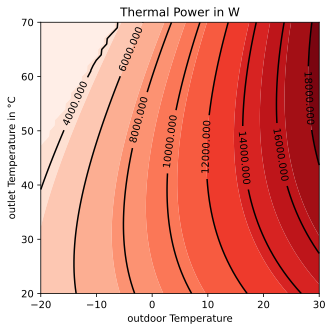

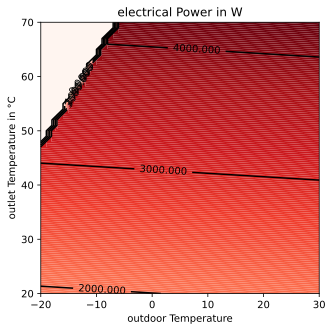

In [151]:
T_low=[*range(-20,31,1)]#inflow TEMP
T_high=[*range(20,71,1)]#outflow TEMP
Tin=[]
Tout=[]
Pth_keyfit=[]
Pel_keyfit=[]
parameter=getPara('LW 101')#LW 101 MHC-V16W/D2RN8-B**** 
for x in T_low:
    for y in T_high:
        p_th = getPowerHP(x,y,parameter)[0]
        p_el = getPowerHP(x,y,parameter)[2]
        Tin.append(x)
        Tout.append(y)
        Pth_keyfit.append(p_th)
        Pel_keyfit.append(p_el)
#create Dataframe for plotting        
heatingPower=pd.DataFrame()
heatingPower['Tin']=Tin
Tin1=Tin
Tout1=Tout
heatingPower['Tout']=Tout
heatingPower['Pth']=Pth_keyfit

Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
Tin_unique = np.sort(heatingPower.Tin.unique())
Tout_unique = np.sort(heatingPower.Tout.unique())
Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
set_matplotlib_formats('svg')
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
levels = np.array([*range(-10000,20000,2000)])

# Generate a color mapping of the levels we've specified
cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
ax.set_title('Thermal Power in W')
ax.set_xlabel('outdoor Temperature')
_ = ax.set_ylabel('outlet Temperature in °C')
plt.show()



#create Dataframe for plotting        
heatingPower=pd.DataFrame()
heatingPower['Tin']=Tin1
heatingPower['Tout']=Tout1
heatingPower['Pel']=Pel_keyfit

Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pel').T.values
Tin_unique = np.sort(heatingPower.Tin.unique())
Tout_unique = np.sort(heatingPower.Tout.unique())
Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
set_matplotlib_formats('svg')
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
levels = np.array([*range(-100000,200000,1000)])

# Generate a color mapping of the levels we've specified
cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
ax.set_title('electrical Power in W')
ax.set_xlabel('outdoor Temperature')
_ = ax.set_ylabel('outlet Temperature in °C')
plt.show()

